In [47]:
import os
print(os.getcwd())

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from datetime import timedelta, datetime
import sys

sys.path.append('/home/mi/rrszynka/mnt/janek/Beesbook-life/Python-modules/')
from bee_helpers import calc_trip_lengths, calc_trip_starts, get_forager_bee_ids, get_random_bee_ids, get_all_bee_ids
from file_helpers import cache_location_prefix, detections_to_presence, detections_to_presence_locations, create_presence_cache_filename, create_presence_locations_cache_filename, create_presence_cache_filename, cache_location_prefix, create_presence_locations_cam_cache_filename

from pathlib import Path
from tqdm import tqdm

/home/mi/rrszynka/mnt/janek/Beesbook-life/Trips


In [48]:
datetime_start = datetime(2016, 7, 19) #TODO: set beginning date as default param in file helpers
num_days_to_process = 60
num_intervals_per_hour = 60 #TODO: if considered 
num_hours = 24 #TODO: set as default param in file helpers

In [49]:
presence_dfs = []

for i in range(0, num_days_to_process):
    start_day = datetime_start+timedelta(days=i)
    (csv_name, csv_path) = create_presence_cache_filename(num_hours, start_day, num_intervals_per_hour)
    file = Path(csv_path)
    if file.exists() == False:
        print(csv_path+ " doesn't exist")
    else: 
        new_presence_df = pd.read_csv(csv_path).iloc[:,1:]
        new_presence_df = new_presence_df.drop(columns='id')
        presence_dfs.append(new_presence_df)
        print("Adding df #"+str(i)+", "+csv_name)

/home/mi/rrszynka/mnt/janek/caches//Presence/PRESENCE-2016-07-19_00_num_hours_24_int_size_60.csv doesn't exist
Adding df #1, PRESENCE-2016-07-20_00_num_hours_24_int_size_60.csv
Adding df #2, PRESENCE-2016-07-21_00_num_hours_24_int_size_60.csv
Adding df #3, PRESENCE-2016-07-22_00_num_hours_24_int_size_60.csv
Adding df #4, PRESENCE-2016-07-23_00_num_hours_24_int_size_60.csv
Adding df #5, PRESENCE-2016-07-24_00_num_hours_24_int_size_60.csv
Adding df #6, PRESENCE-2016-07-25_00_num_hours_24_int_size_60.csv
Adding df #7, PRESENCE-2016-07-26_00_num_hours_24_int_size_60.csv
Adding df #8, PRESENCE-2016-07-27_00_num_hours_24_int_size_60.csv
Adding df #9, PRESENCE-2016-07-28_00_num_hours_24_int_size_60.csv
Adding df #10, PRESENCE-2016-07-29_00_num_hours_24_int_size_60.csv
Adding df #11, PRESENCE-2016-07-30_00_num_hours_24_int_size_60.csv
Adding df #12, PRESENCE-2016-07-31_00_num_hours_24_int_size_60.csv
Adding df #13, PRESENCE-2016-08-01_00_num_hours_24_int_size_60.csv
Adding df #14, PRESENCE-201

In [ ]:
# Save or load - takes very long, try switching from csv to hdf 
# presence_df.to_csv('../../caches/Presence/COMBINED_PRESENCE_59d_24h_from_07-19.csv')
# presence_df = pd.read_csv('../../caches/Presence/COMBINED_PRESENCE_59d_24h_from_07-19.csv', index_col='bee_id')

In [35]:
presence_df = pd.concat(presence_dfs, axis=1)
presence_df.index.rename('bee_id', inplace=True)

In [716]:
presence_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439
bee_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
sum_pres_by_bee = presence_df.sum(axis=1)
sum_pres_by_bee = sum_pres_by_bee.to_frame()
sum_pres_by_bee.columns = ['presence_score_total']

In [718]:
lives_from_detections_df = pd.read_csv('../../caches/Other/lives_from_detections_df.csv', 
                                       index_col='bee_id', 
                                       parse_dates=['min', 'max'])

In [719]:
presence_with_lifespan_work.head()

,presence_score_total,min,max,lifespan,presence_coefficient
bee_id,,,,,
2,8.0,2016-08-03,2016-08-21,54.0,0.000103
4,71.0,2016-07-30,2016-08-24,57.0,0.000865
8,104.0,2016-07-30,2016-08-16,49.0,0.001474
9,3953.0,2016-07-19,2016-08-06,39.0,0.070388
10,5714.0,2016-07-19,2016-08-17,50.0,0.079361


In [717]:
presence_with_lifespan = sum_pres_by_bee.join(lives_from_detections_df, how='outer')
presence_with_lifespan['presence_coefficient'] = presence_with_lifespan.presence_score_total/(presence_with_lifespan.lifespan*1440) # normalization step
presence_with_lifespan_work = presence_with_lifespan[presence_with_lifespan.lifespan > 0]

[Text(0.5,1,'Distribution of presence_coefficient values among 2233 bees. \n(a value of 1.0 would mean 100% presence in the hive)')]

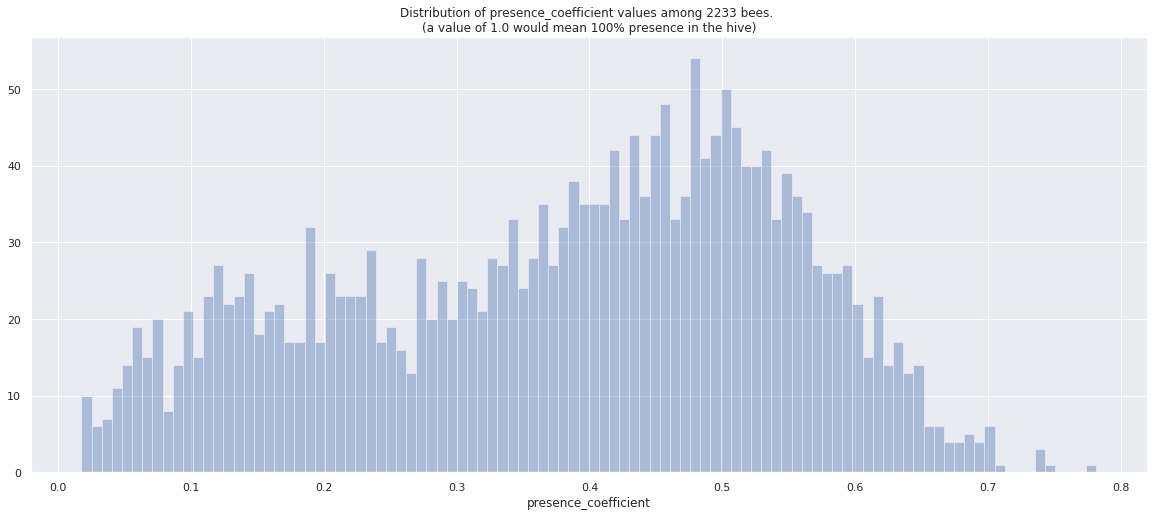

In [114]:
pres_hist = (presence_with_lifespan_work[presence_with_lifespan_work.presence_score_total > 1440]).presence_coefficient
title = 'Distribution of presence_coefficient values among ' + str(len(pres_hist)) + ' bees. \n(a value of 1.0 would mean 100% presence in the hive)'
plt.subplots(figsize=(20,8))
ax = sns.distplot(pres_hist, bins=100, kde=False)
ax.set(title=title)

In [18]:
presence_with_lifespan_work.head()

,presence_score_total,min,max,lifespan,presence_coefficient
bee_id,,,,,
2,8.0,2016-08-03,2016-08-21,18.0,0.000309
4,71.0,2016-07-30,2016-08-24,25.0,0.001972
5,4.0,2016-07-30,2016-08-25,26.0,0.000107
8,104.0,2016-07-30,2016-08-16,17.0,0.004248
9,3953.0,2016-07-19,2016-08-06,18.0,0.152508


In [115]:
aggregate_pres_by_minute = presence_df.sum(axis='rows')

In [119]:
aggregate_pres_by_minute.shape

(84960,)

In [121]:
24*59*60

84960

In [116]:
pres_by_hour = []
for i in np.arange(0, 1416): #24hours * 59 days 
    newHour = aggregate_pres_by_minute[i*60:(i+1)*60].sum()
    pres_by_hour.append(newHour)

In [117]:
pres_by_hour = pd.DataFrame(pres_by_hour, columns=['presence'])

In [204]:
begin = 0 
days = 3

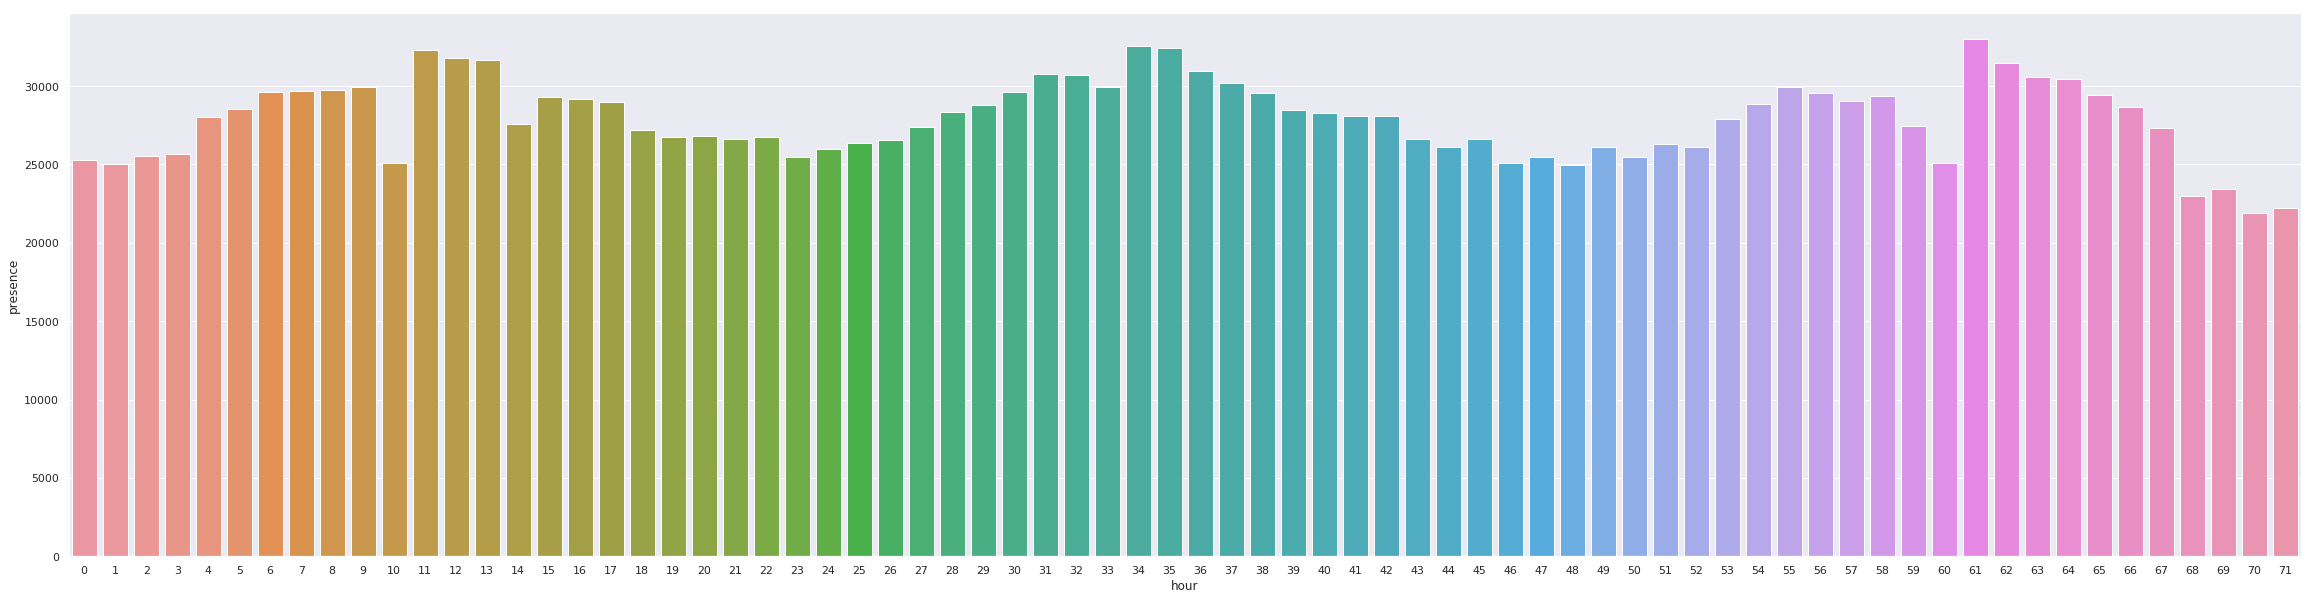

In [205]:
fig, ax = plt.subplots()
fig.set_size_inches(40,10)
pres_by_hour.index.name = 'hour'
pres_by_hour['hour'] = pres_by_hour.index
sns.barplot(x='hour', y='presence', data=pres_by_hour[begin:begin+days*24], ax=ax)
begin += days*24

In [168]:
# sns.distplot(pres_by_hour)

In [228]:
daily_presences = []
presence_from_morning = presence_df.iloc[:,7*60:]

for i in np.arange(0, 59): #59 days
    begin = i*60*24
    end = begin+60*12
    day = presence_from_morning.iloc[:,begin:end]
    daily_presences.append(day.sum(axis=1))

In [229]:
presence_with_lifespan_long_lives = presence_with_lifespan_work[presence_with_lifespan_work['lifespan'] > 15]
presence_with_lifespan_long_lives.shape

daily_presences = pd.concat(daily_presences, axis=1)
daily_presences = daily_presences/(12*60)
daily_presences = daily_presences.loc[presence_with_lifespan_long_lives.index]

In [469]:
pres_by_ages = daily_presences*0 #create a DataFrame with the same shape and labels, but empty
pres_by_ages.shape
day_0 = datetime(2016, 7, 19)

daily_presences

for day in tqdm(pres_by_ages.columns):
    for bee in pres_by_ages.index: #of a bee
        bee_birth_date = presence_with_lifespan_work.loc[bee]['min']
        if presence_with_lifespan_work.loc[bee]['lifespan'] < day:
            pres_by_ages.loc[bee, day] = np.nan
        else:
            bee_life_day = bee_birth_date+timedelta(day)
            experiment_day = (bee_life_day - day_0).days
            if experiment_day > 58:
                continue
            pres_by_ages.loc[bee, day] = daily_presences.loc[bee, experiment_day]

100%|██████████| 59/59 [00:48<00:00,  1.21it/s]


In [471]:
pres_by_ages = pres_by_ages[(pres_by_ages.sum(axis=1) > 1)] # filter bees with low presence again 

In [472]:
pres_by_ages.shape

(1516, 59)

Text(0,0.5,'Avg. presence coefficient')

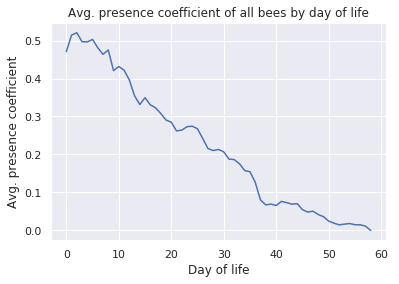

In [547]:
pres_by_ages_per_bee = pres_by_ages.sum()/(pres_by_ages.isnull() == False).sum()
ax = sns.lineplot(data=pres_by_ages_per_bee)
ax.set_title('Avg. presence coefficient of all bees by day of life')
ax.set_xlabel('Day of life')
ax.set_ylabel('Avg. presence coefficient')

In [474]:
pres_by_ages.head()

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
bee_id,,,,,,,,,,,,,,,,,,,,,
9,0.662500,0.661111,0.641667,0.620833,0.137500,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,0.462500,0.544444,0.295833,0.334722,0.250000,0.223611,0.358333,0.168056,0.283333,0.162500,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,0.519444,0.380556,0.197222,0.031944,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,0.572222,0.631944,0.734722,0.579167,0.540278,0.463889,0.447222,0.529167,0.440278,0.376389,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
22,0.406944,0.430556,0.468056,0.468056,0.166667,0.316667,0.291667,0.261111,0.481944,0.136111,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [542]:
import random

Text(0.5,1,'Presence coefficient by day, for bee #709')

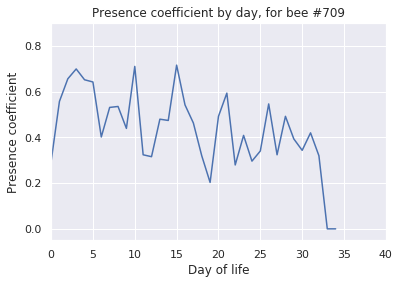

In [728]:
i = random.randint(0, pres_by_ages.shape[0])
ax = sns.lineplot(data=pres_by_ages.iloc[i])
ax.set(ylim=[-0.05,0.9], xlim=[0,40])
ax.set_xlabel('Day of life')
ax.set_ylabel('Presence coefficient')
ax.set_title('Presence coefficient by day, for bee #'+str(i))

In [564]:
foragers_from_groups = pd.read_pickle('/home/mi/rrszynka/mnt/janek/caches/Other/foragers_from_groups.pkl').drop(columns=['bee_id'])

forager_lives = pd.merge(lives_from_detections_df, foragers_from_groups, how='inner', on='bee_id')


forager_lives.rename(columns={'min':'born', 'max':'died', 'date': 'foraging_min_date'}, inplace=True)
forager_lives_short = forager_lives[~forager_lives.index.duplicated()]


foraging_max_date = forager_lives[~forager_lives.index.duplicated(keep='last')].foraging_min_date.rename('foraging_max_date')
forager_lives_short = pd.merge(forager_lives_short, pd.DataFrame(foraging_max_date), how='inner', on='bee_id')
forager_lives_short = forager_lives_short.drop(columns=["group_id", "location"])

forager_lives_short['foraging_min_age'] = (forager_lives_short.foraging_min_date - forager_lives_short.born)
forager_lives_short['foraging_max_age'] = (forager_lives_short.foraging_max_date - forager_lives_short.born)

forager_lives_short.head()

,born,died,lifespan,foraging_min_date,foraging_max_date,foraging_min_age,foraging_max_age
bee_id,,,,,,,
135,2016-07-19,2016-08-24,56.0,2016-08-01,2016-08-05,13 days,17 days
199,2016-07-19,2016-08-20,52.0,2016-07-31,2016-08-18,12 days,30 days
217,2016-07-19,2016-08-03,35.0,2016-07-28,2016-08-02,9 days,14 days
220,2016-07-19,2016-08-06,38.0,2016-08-01,2016-08-05,13 days,17 days
228,2016-07-19,2016-08-10,41.0,2016-07-31,2016-08-05,12 days,17 days


In [566]:
foragers = forager_lives_short.index 

Int64Index([ 135,  199,  217,  220,  228,  233,  253,  319,  337,  392,  400,
             539,  555,  644,  648,  675,  710,  727,  769,  785,  818,  845,
             860,  885,  912,  931, 1110, 1122, 1180, 1197, 1232, 1362, 1471,
            1507, 1518, 1593, 1662, 1689, 1714, 1793, 1799, 1817, 2031, 2106,
            2412, 2475, 2570, 2776, 2984, 3037],
           dtype='int64', name='bee_id')

Text(0.5,1,'Presence coefficient by day, for bee #253\n with first and last known forage marked')

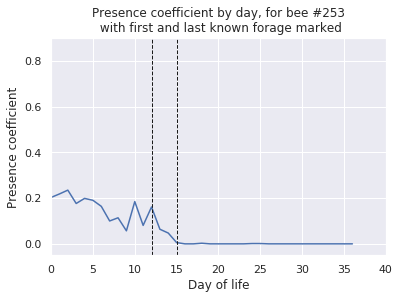

In [712]:
j = random.randint(0, forager_lives_short.shape[0])
foragers = forager_lives_short.index 
bee = foragers[j]
ax = sns.lineplot(data=pres_by_ages.loc[bee])
ax.set(ylim=[-0.05,0.9], xlim=[0,40])
plt.axvline(x=forager_lives_short.loc[bee].foraging_min_age.days, color='k', linestyle='--', linewidth=1)
plt.axvline(x=forager_lives_short.loc[bee].foraging_max_age.days, color='k', linestyle='--', linewidth=1)
ax.set_xlabel('Day of life')
ax.set_ylabel('Presence coefficient')
ax.set_title('Presence coefficient by day, for bee #'+str(foragers[j])+"\n with first and last known forage marked")